In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

def unique(lists):
    unique_list = pd.Series(lists).drop_duplicates().tolist()
    for x in unique_list:
        print(x)

In [186]:
churn = pd.read_csv('telco_churn_data.csv')
pd.set_option('display.max_columns', None)
churn.columns = churn.columns.str.replace(' ', '_')
churn = churn.drop('Customer_ID', axis = 1)
churn = churn.drop('Under_30', axis = 1)
churn = churn.drop('Senior_Citizen', axis = 1)
churn = churn.drop('Dependents', axis = 1)
churn = churn.drop('City', axis = 1)
churn = churn.drop('Churn_Reason', axis = 1)
churn = churn.drop('Latitude', axis = 1)
churn = churn.drop('Longitude', axis = 1)
churn.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
0,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,0,90022,68701,1,5433,Competitor,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,Yes,1,90063,55668,1,5302,Competitor,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,3,90065,47534,1,3179,Competitor,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,Yes,1,90303,27778,1,5337,Dissatisfaction,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,Yes,1,90602,26265,1,2793,Price,1,0,2.0


In [187]:
binary = {'No': 0, 'Yes': 1}
churn['Referred_a_Friend'] = churn['Referred_a_Friend'].map(binary)
churn['Phone_Service'] = churn['Phone_Service'].map(binary)
churn['Multiple_Lines'] = churn['Multiple_Lines'].map(binary)
churn['Internet_Service'] = churn['Internet_Service'].map(binary)
churn['Online_Security'] = churn['Online_Security'].map(binary)
churn['Online_Backup'] = churn['Online_Backup'].map(binary)
churn['Device_Protection_Plan'] = churn['Device_Protection_Plan'].map(binary)
churn['Premium_Tech_Support'] = churn['Premium_Tech_Support'].map(binary)
churn['Streaming_TV'] = churn['Streaming_TV'].map(binary)
churn['Streaming_Movies'] = churn['Streaming_Movies'].map(binary)
churn['Streaming_Music'] = churn['Streaming_Music'].map(binary)
churn['Unlimited_Data'] = churn['Unlimited_Data'].map(binary)
churn['Paperless_Billing'] = churn['Paperless_Billing'].map(binary)
churn['Married'] = churn['Married'].map(binary)

offer = {'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5}
churn['Offer'] = churn['Offer'].map(offer)

payment = {'Bank Withdrawal': 1, 'Credit Card': 2, 'Mailed Check': 3}
churn['Payment_Method'] = churn['Payment_Method'].map(payment)

contract = {'One Year': 1, 'Two Year': 2, 'Month-to-Month': 3}
churn['Contract'] = churn['Contract'].map(contract)

gender = {'Male': 1, 'Female': 2}
churn['Gender'] = churn['Gender'].map(gender)

category = {'Competitor': 1, 'Dissatisfaction': 2, 'Price': 3, 'Attitude': 4, 'Other': 5}
churn['Churn_Category'] = churn['Churn_Category'].map(category)

internet = {'Fiber Optic': 1, 'Cable': 2, 'DSL': 3}
churn['Internet_Type'] = churn['Internet_Type'].map(internet)

In [188]:
churn['Offer'] = churn['Offer'].interpolate(method = 'linear')
churn['Internet_Type'] = churn['Internet_Type'].interpolate(method = 'linear')
churn['Churn_Category'] = churn['Churn_Category'].interpolate(method = 'linear')
churn['Customer_Satisfaction'] = churn['Customer_Satisfaction'].interpolate(method = 'linear')
churn['Customer_Satisfaction'] = churn['Customer_Satisfaction'].round()
churn = churn.dropna()

In [189]:
churn.describe()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
count,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000
mean,0.457528,1.952557,32.396733,3.176065,0.903267,22.960189,0.421733,0.783239,1.882102,21.107813,0.286790,0.344886,0.343892,0.290341,0.384375,0.387784,0.353267,0.383949,2.292187,0.592045,1.499716,65.534857,2281.008486,1.956540,278.600858,749.334000,1.495313,46.497869,0.483097,0.468324,93487.534801,22124.619744,0.265057,4400.194460,1.350426,1.337784,0.308239,3.250568
std,0.498228,3.001637,24.542117,1.342474,0.295615,15.445277,0.493871,0.412068,0.802290,20.948055,0.452295,0.475365,0.475039,0.453952,0.486482,0.487280,0.478019,0.486380,0.804517,0.491490,0.599521,30.608536,2266.452151,7.887088,685.166897,846.757654,0.500014,16.743962,0.499750,0.962497,1855.807285,21143.672280,0.441395,1183.106847,0.946689,1.429438,0.717639,1.138885
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,2003.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,9.000000,2.000000,1.000000,9.210000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,35.860000,400.225000,0.000000,0.000000,70.567500,1.000000,32.000000,0.000000,0.000000,92102.000000,2344.000000,0.000000,3469.000000,1.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,29.000000,3.000000,1.000000,22.890000,0.000000,1.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,71.968000,1394.800000,0.000000,0.000000,401.960000,1.000000,46.000000,0.000000,0.000000,93518.000000,17494.000000,0.000000,4526.500000,1.000000,1.000000,0.000000,3.000000
75%,1.000000,3.000000,55.000000,4.250000,1.000000,36.392500,1.000000,1.000000,3.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,90.650000,3789.800000,0.000000,183.000000,1191.607500,2.000000,60.000000,1.000000,0.000000,95329.000000,36125.000000,1.000000,5380.250000,1.000000,2.000000,0.000000,4.000000
max,1.000000,11.000000,72.000000,5.000000,1.000000,49.990000,1.000000,1.000000,3.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,2.000000,80.000000,1.000000,9.000000,96150.000000,105285.000000,1.000000,6500.000000,5.000000,9.000000,6.000000,5.000000


In [190]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7040 entries, 3 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred_a_Friend                  7040 non-null   int64  
 1   Number_of_Referrals                7040 non-null   int64  
 2   Tenure_in_Months                   7040 non-null   int64  
 3   Offer                              7040 non-null   float64
 4   Phone_Service                      7040 non-null   int64  
 5   Avg_Monthly_Long_Distance_Charges  7040 non-null   float64
 6   Multiple_Lines                     7040 non-null   int64  
 7   Internet_Service                   7040 non-null   int64  
 8   Internet_Type                      7040 non-null   float64
 9   Avg_Monthly_GB_Download            7040 non-null   int64  
 10  Online_Security                    7040 non-null   int64  
 11  Online_Backup                      7040 non-null   int64  
 1

In [191]:
print(churn.isnull().sum())

Referred_a_Friend                    0
Number_of_Referrals                  0
Tenure_in_Months                     0
Offer                                0
Phone_Service                        0
Avg_Monthly_Long_Distance_Charges    0
Multiple_Lines                       0
Internet_Service                     0
Internet_Type                        0
Avg_Monthly_GB_Download              0
Online_Security                      0
Online_Backup                        0
Device_Protection_Plan               0
Premium_Tech_Support                 0
Streaming_TV                         0
Streaming_Movies                     0
Streaming_Music                      0
Unlimited_Data                       0
Contract                             0
Paperless_Billing                    0
Payment_Method                       0
Monthly_Charge                       0
Total_Regular_Charges                0
Total_Refunds                        0
Total_Extra_Data_Charges             0
Total_Long_Distance_Charg

In [192]:
X = churn.iloc[:, 0:37]
y = churn.iloc[:, -1]
y_label = y.values

columns_list = X.columns.tolist()
tree = pd.DataFrame(X, columns = columns_list)
churn['Customer_Satisfaction'] = y_label
churn.groupby('Customer_Satisfaction').mean()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported
Customer_Satisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.324832,0.493960,16.867114,3.928661,0.907383,23.041356,0.448322,0.948993,2.058389,25.562416,0.200000,0.261745,0.284564,0.169128,0.434899,0.456376,0.409396,0.277852,2.838926,0.763758,1.378523,77.443877,1433.979128,1.446148,271.171597,409.458470,1.507383,49.593289,0.344966,0.119463,93405.041611,24430.655034,0.998658,4109.500671,2.102013,2.598658,0.957047
2.0,0.348837,0.572827,18.933905,3.728542,0.905753,23.448042,0.462668,0.946144,2.033048,23.619339,0.150551,0.310894,0.298654,0.161567,0.456548,0.432069,0.376989,0.283966,2.790698,0.733170,1.343941,78.323980,1630.687699,1.755532,280.291114,455.543745,1.490820,50.216646,0.376989,0.104039,93474.708690,24063.707466,0.996328,4161.742962,2.440636,2.571603,0.687882
3.0,0.494467,2.321824,35.753873,3.008783,0.907039,23.044400,0.425852,0.755201,1.864772,20.748561,0.335104,0.366534,0.354582,0.316512,0.366977,0.371846,0.340859,0.397964,2.184152,0.558654,1.523683,63.575819,2491.586078,1.991377,298.741541,834.493502,1.497123,46.116423,0.520584,0.511288,93360.661355,22046.150066,0.135015,4453.132802,1.205843,1.169987,0.203630
4.0,0.490494,2.380228,37.779045,2.974528,0.892269,22.565167,0.407267,0.732150,1.812282,19.632446,0.329531,0.363329,0.369666,0.340093,0.376848,0.380228,0.347698,0.426278,2.101817,0.534432,1.546261,61.418519,2559.347550,2.302877,266.106633,853.430739,1.495564,45.544571,0.514998,0.603295,93585.663287,21421.995775,0.001267,4503.845374,1.001690,0.809886,0.120406
5.0,0.488263,2.383803,35.031690,2.991643,0.917840,23.295563,0.388498,0.698357,1.823132,19.855634,0.246479,0.341549,0.339202,0.312207,0.338028,0.348592,0.329812,0.417840,2.151408,0.555164,1.562207,59.487793,2313.667653,1.541033,264.786174,813.256080,1.483568,43.884977,0.517606,0.633803,93635.742958,20408.825117,0.000000,4454.715962,1.000000,0.963615,0.176056


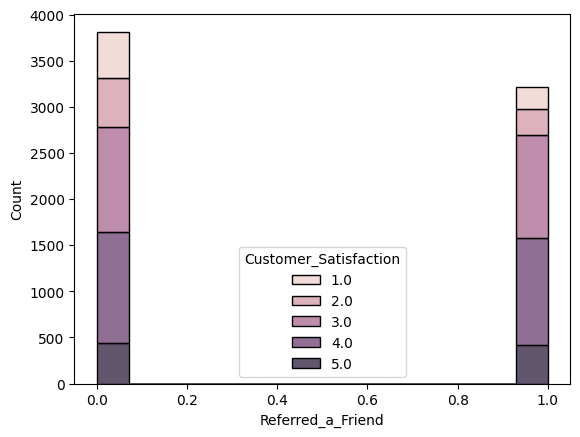

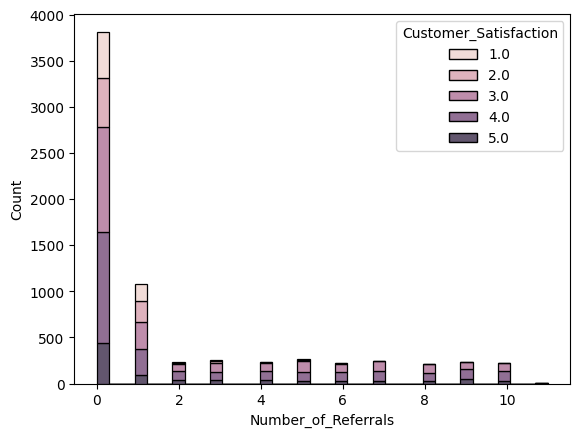

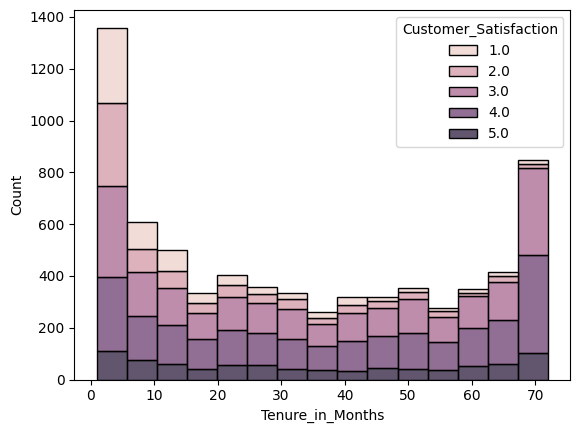

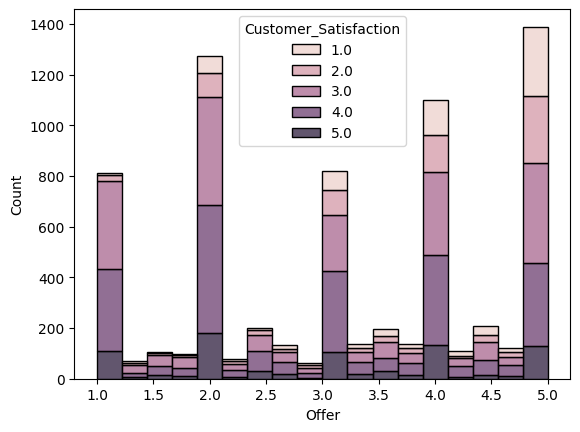

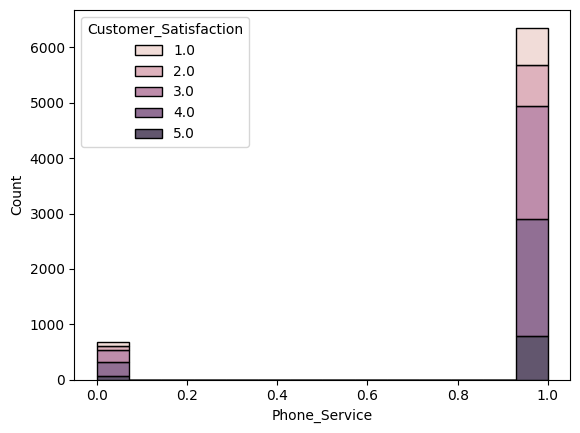

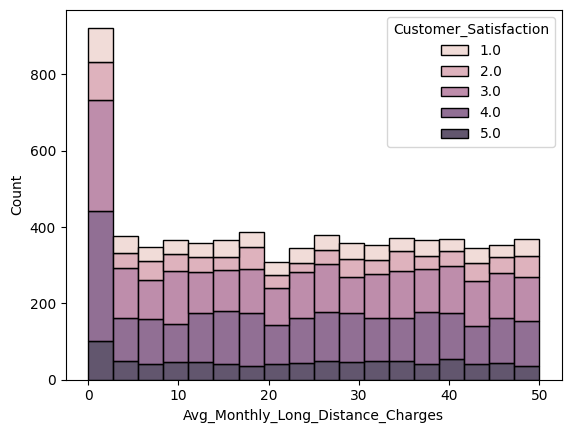

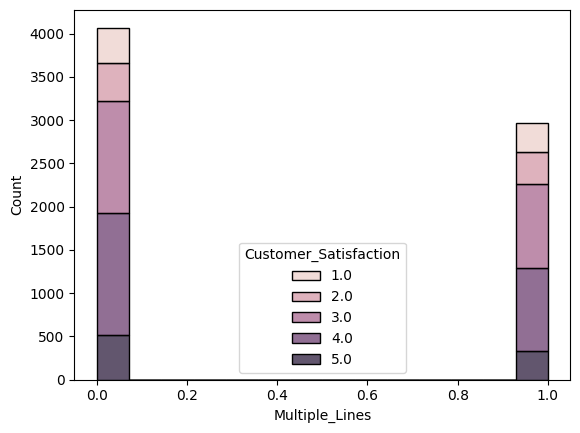

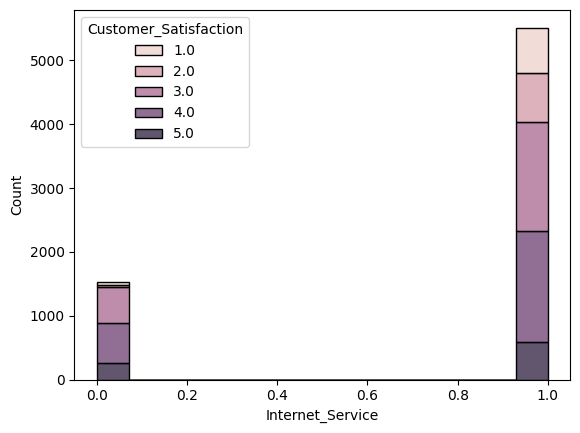

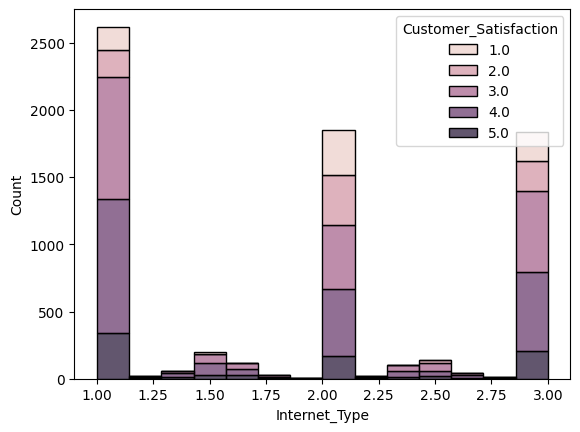

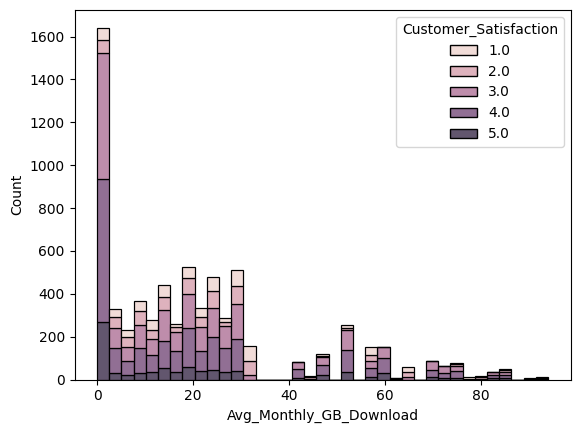

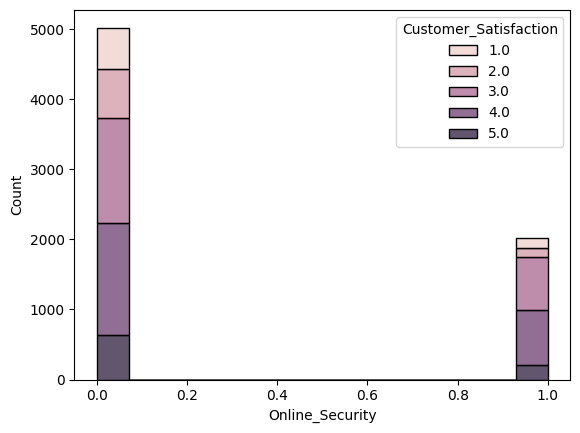

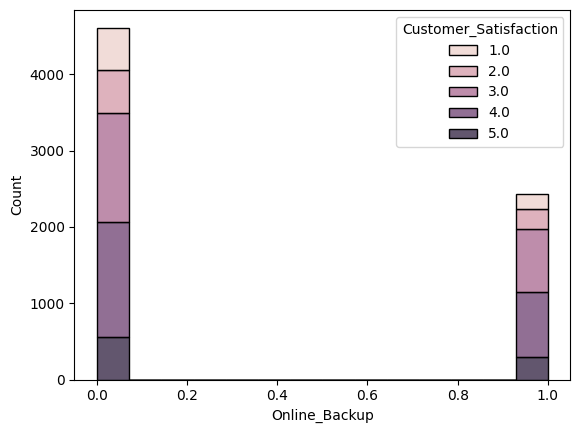

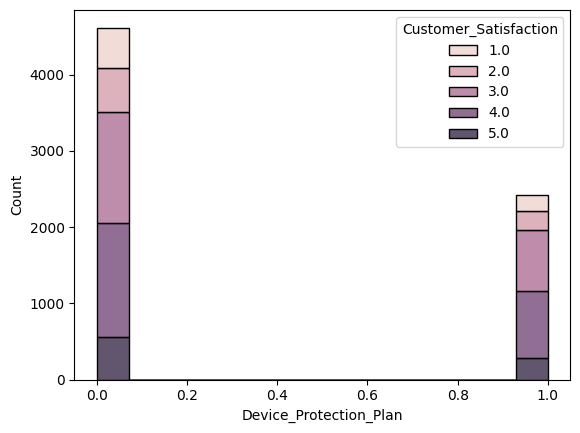

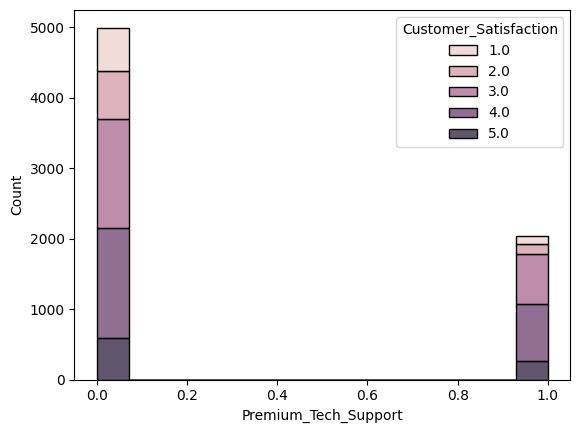

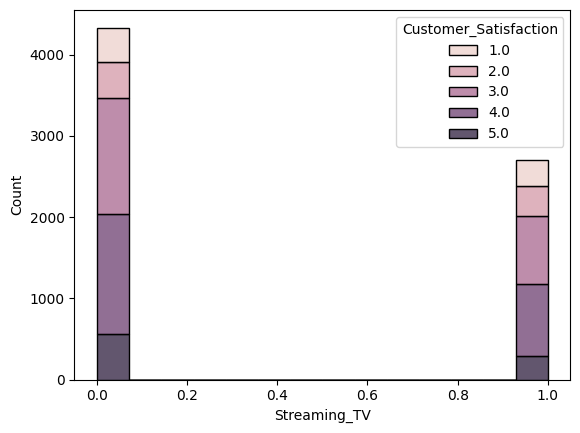

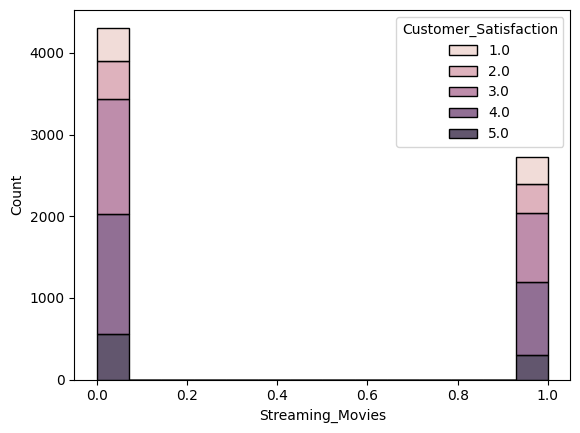

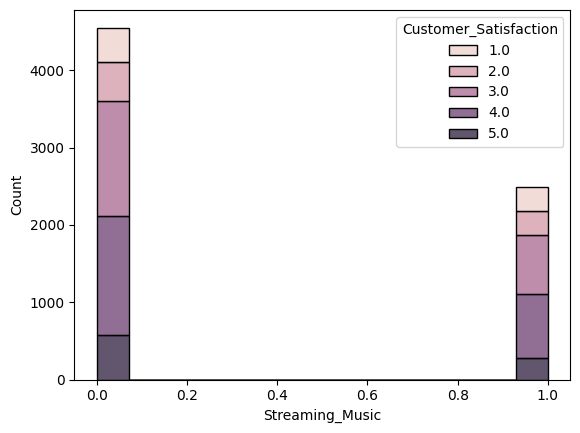

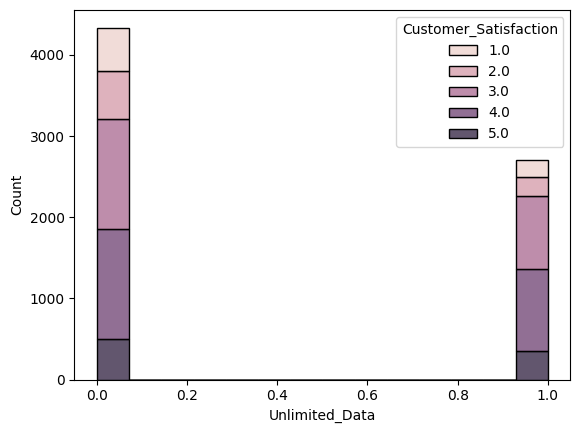

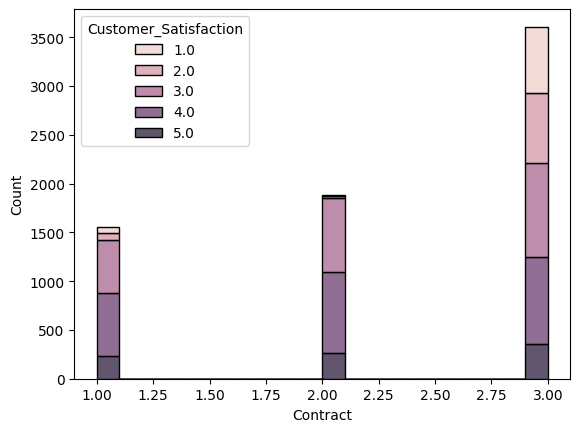

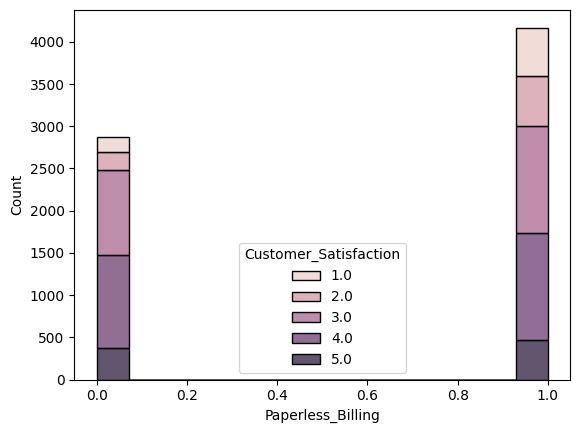

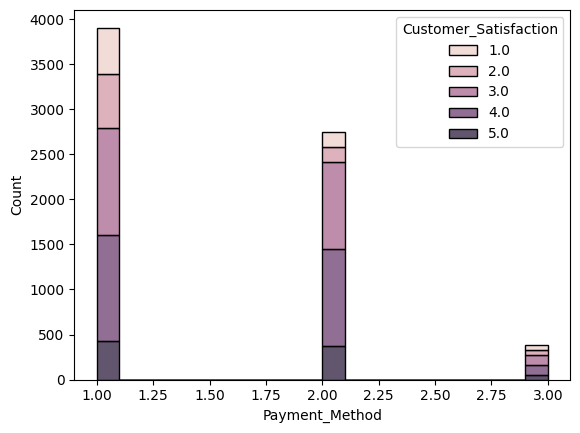

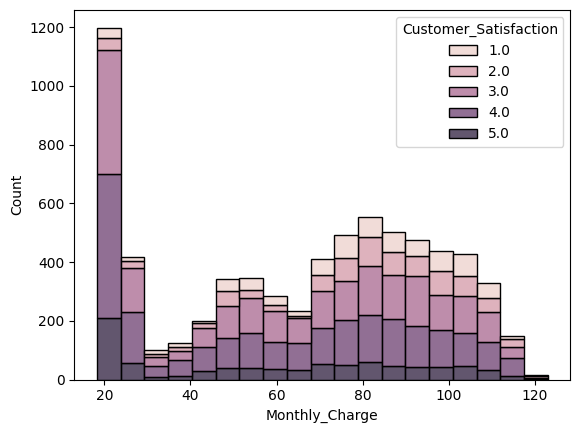

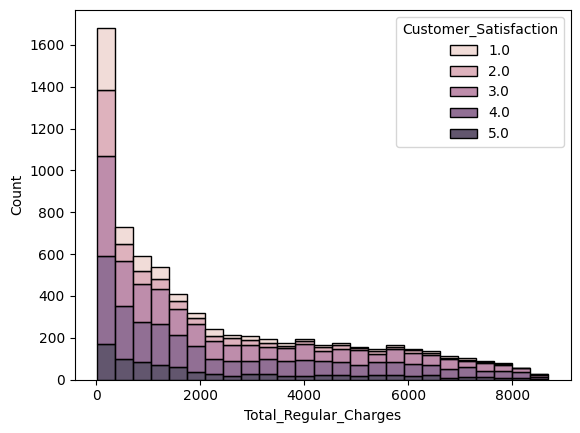

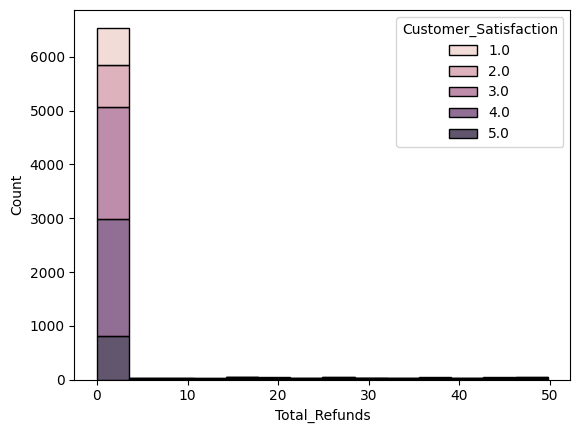

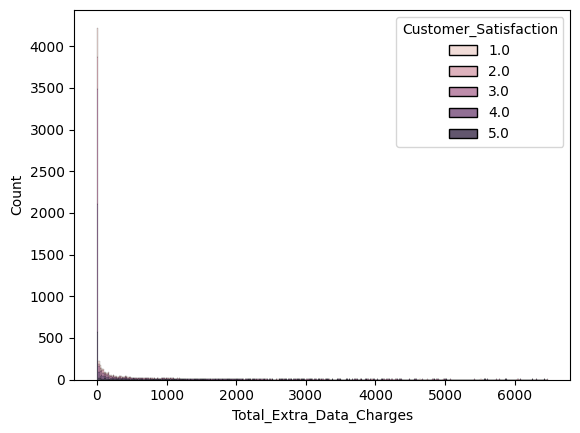

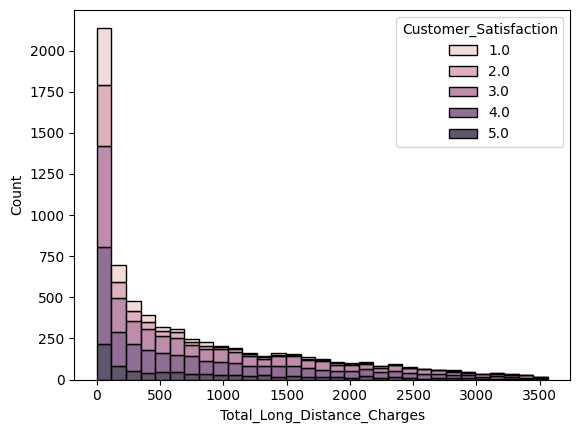

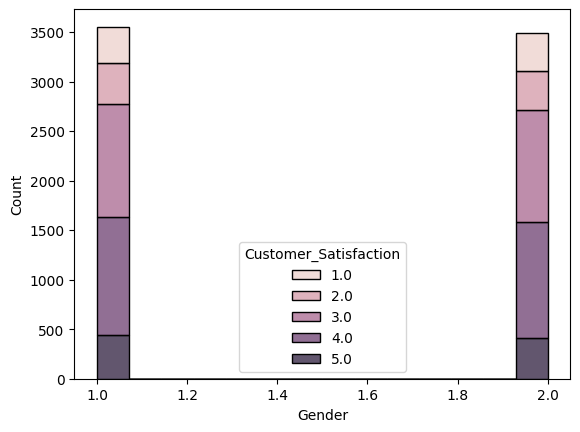

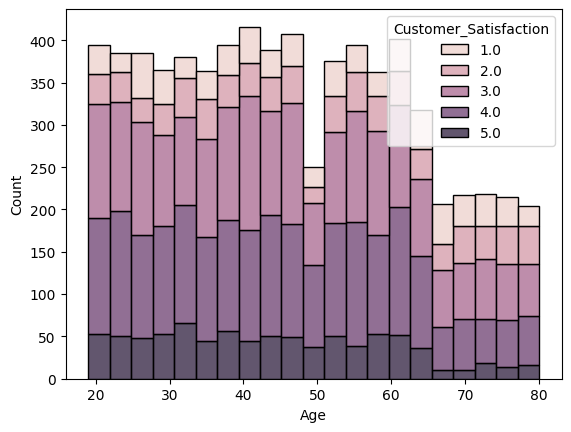

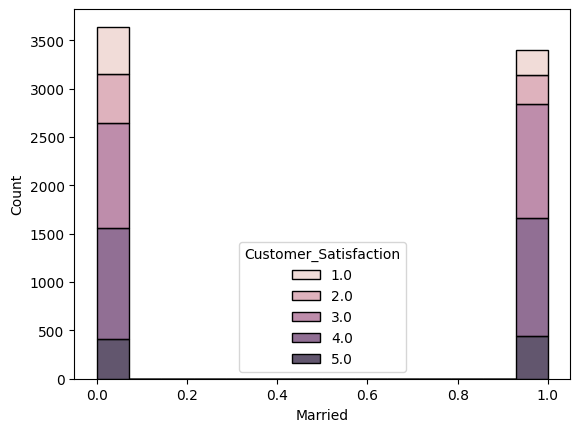

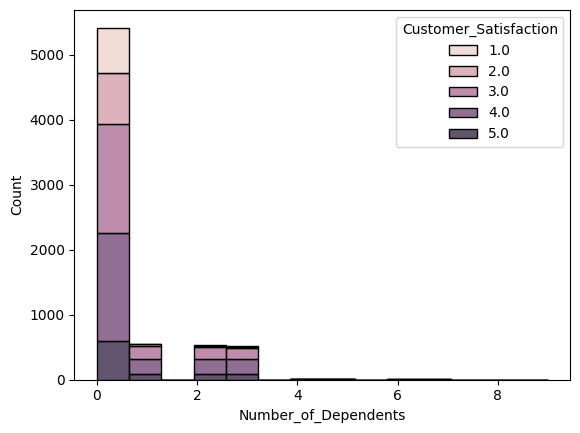

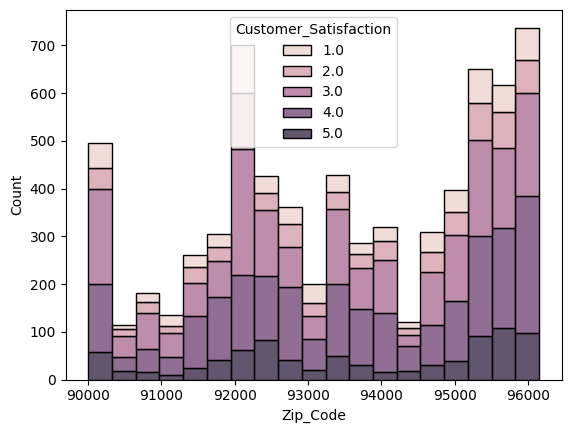

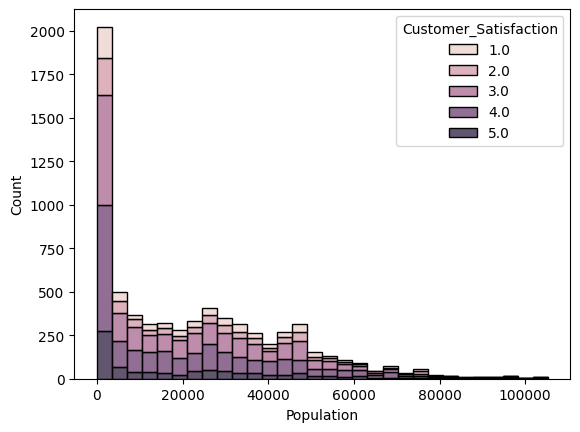

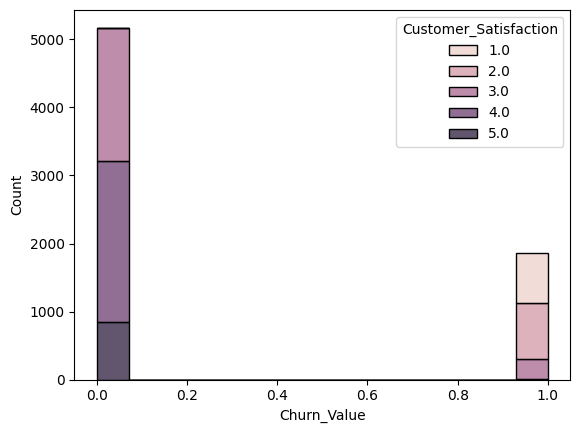

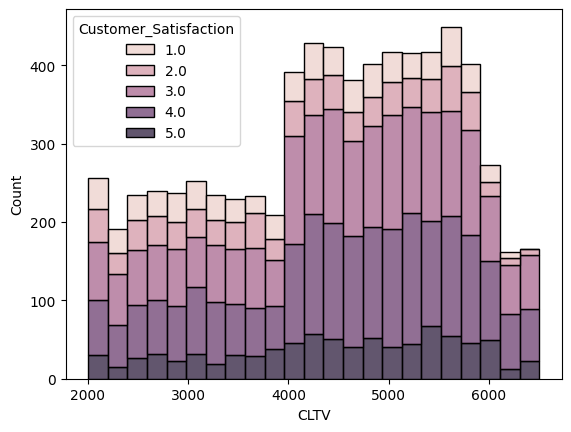

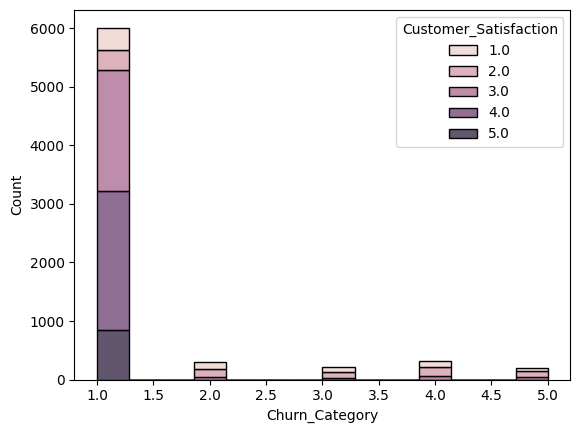

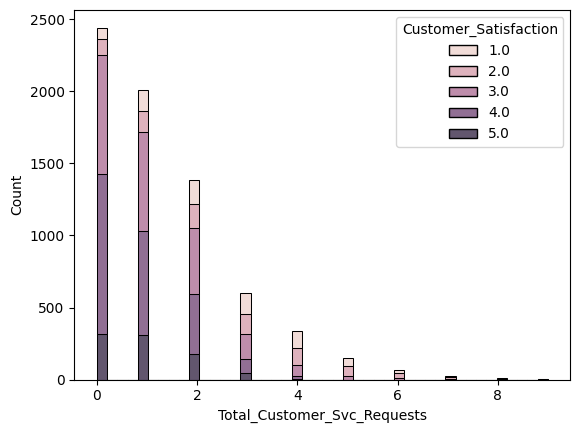

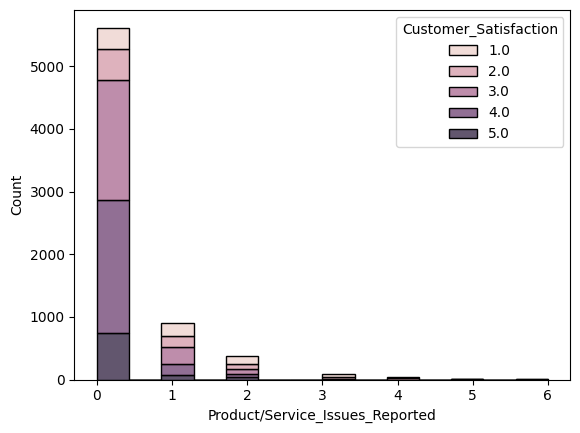

In [194]:
sb.histplot(data = churn, x = "Referred_a_Friend", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Number_of_Referrals", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Tenure_in_Months", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Offer", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Phone_Service", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Avg_Monthly_Long_Distance_Charges", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Multiple_Lines", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Internet_Service", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Internet_Type", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Avg_Monthly_GB_Download", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Online_Security", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Online_Backup", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Device_Protection_Plan", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Premium_Tech_Support", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Streaming_TV", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Streaming_Movies", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Streaming_Music", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Unlimited_Data", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Contract", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Paperless_Billing", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Payment_Method", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Monthly_Charge", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Total_Regular_Charges", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Total_Refunds", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Total_Extra_Data_Charges", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Total_Long_Distance_Charges", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Gender", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Age", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Married", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Number_of_Dependents", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Zip_Code", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Population", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Churn_Value", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "CLTV", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Churn_Category", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Total_Customer_Svc_Requests", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()
sb.histplot(data = churn, x = "Product/Service_Issues_Reported", hue = "Customer_Satisfaction", multiple = "stack")
plt.show()